In [17]:
#import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [18]:
#loading the data to pandas dataframe
heart_data = pd.read_csv('heart.csv')

In [19]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
heart_data.shape

(918, 12)

In [21]:
heart = heart_data.to_string()

In [22]:
heart_data['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [23]:
heart_data['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [24]:
heart_data['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [25]:
heart_data['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [26]:
heart_data['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [27]:
#label encoding
label_encode = LabelEncoder()
columns = ['ST_Slope','ExerciseAngina','ChestPainType','RestingECG', 'Sex' ]
for column in  columns:
    heart_data[column] = label_encode.fit_transform(heart_data[column])


In [28]:
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [29]:
heart_data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


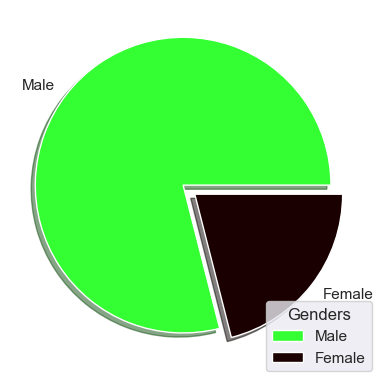

In [30]:
# #analyse the data

values =np.array( heart_data['Sex'].value_counts())
label=['Male', 'Female']
myexpo = [0.1,0]
plt.pie(values, labels=label, explode=myexpo, shadow=True, colors = ['#33ff33', '#1a0000'])
plt.legend(title= 'Genders')
plt.show()

<Figure size 600x600 with 0 Axes>

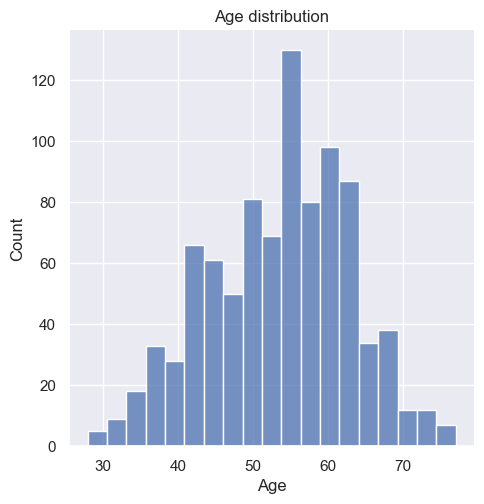

In [31]:
# #analyse the data

sns.set()
plt.figure(figsize=(6,6))
sns.displot(heart_data['Age'])
plt.title('Age distribution')
plt.show()

In [34]:
#splitting the features and target
x = heart_data.drop(columns="HeartDisease", axis=1)
y = heart_data['HeartDisease']

In [35]:
#training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 3)

In [39]:
# model
model = LogisticRegression()
model.fit(X_train, Y_train)
#accuracy score
X_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(X_train_pred, Y_train)
print(training_accuracy)

0.8569482288828338


C:\Users\Masterkim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
#test accuracy
X_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(X_test_pred, Y_test)
print(test_accuracy)

0.8315217391304348


In [ ]:
#making a predictive system
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)
input_array=np.asarray(input_data)
#reshape
input_array_reshape = input_array.reshape(1,-1)
prediction= model.predict(input_array_reshape)
print(prediction)

if (prediction[0] == 0):
    print('The person has healthy heart')
else:
    print('The person has heart issue')